In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
#read the data
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
#correlation matrix
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# scatterplot between variables along with histogram


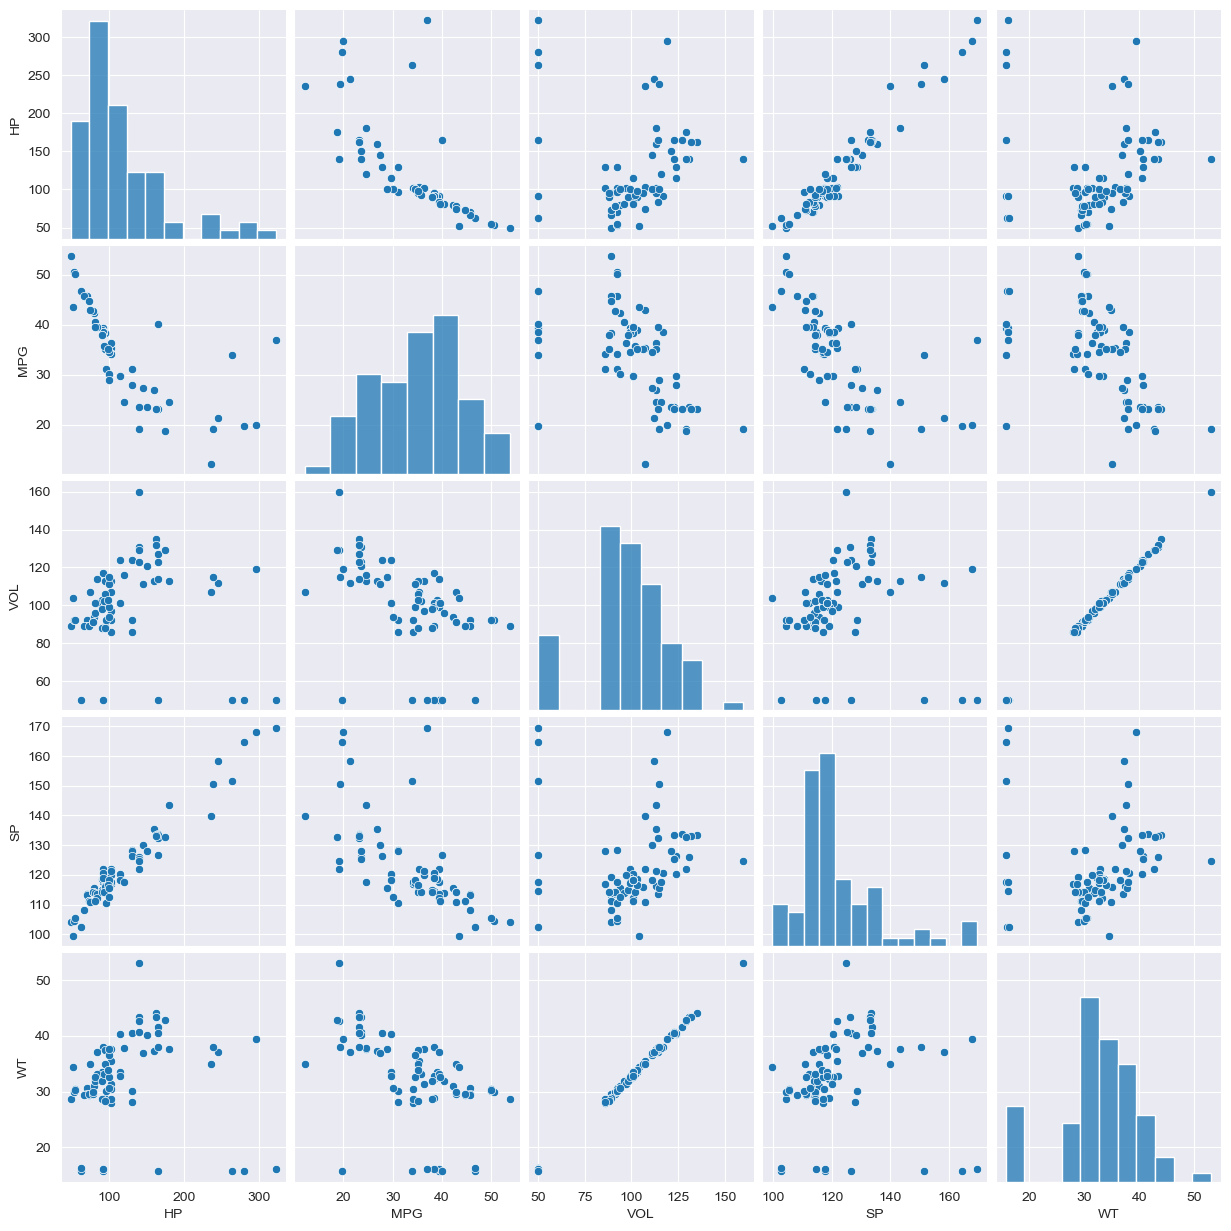

In [7]:
#format the plot background and scatterplots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# preparing a model

In [9]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [10]:
#coefficents
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [11]:
print(model.tvalues, '\n' , model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [13]:
#r squred values
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

# simple linear regression models

In [14]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()

In [15]:
#t and p values
print(ml_v.tvalues, '\n' , ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [16]:
ml_w=smf.ols('MPG~WT',data=cars).fit()

In [17]:
#t and p values
print(ml_w.tvalues, '\n' , ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [19]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit()

In [20]:
#t and p values
print(ml_wv.tvalues, '\n' , ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# calculating vif

In [22]:
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/1-rsq_hp
vif_hp

0.050184203691594154

In [23]:
rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/1-rsq_wt
vif_wt

0.0015636389703668208

In [24]:
rsq_vol=smf.ols('VOL~WT+HP+SP',data=cars).fit().rsquared
vif_vol=1/1-rsq_vol
vif_vol

0.0015654202825866603

In [25]:
rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp=1/1-rsq_sp
vif_sp

0.049980910333465856

In [28]:
d1 = {'variables':['HP','WT','VOL','SP'], 'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}

In [32]:
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,HP,0.050184
1,WT,0.001564
2,VOL,0.001565
3,SP,0.049981


# Residual analysis

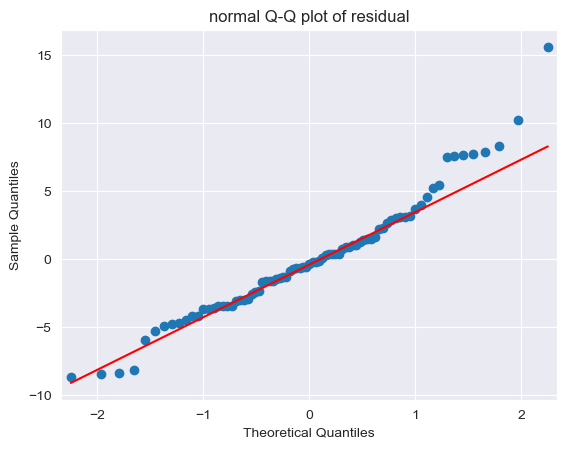

In [33]:
# test for normality of residuals (Q-Q plot)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q plot of residual")
plt.show()

In [34]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

# residual plot for homoscedasticity

In [35]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

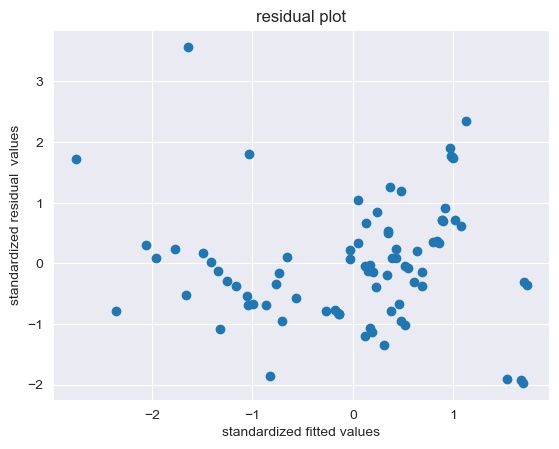

In [36]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual  values')
plt.show()       

# residual vs regressors

eval_env: 1


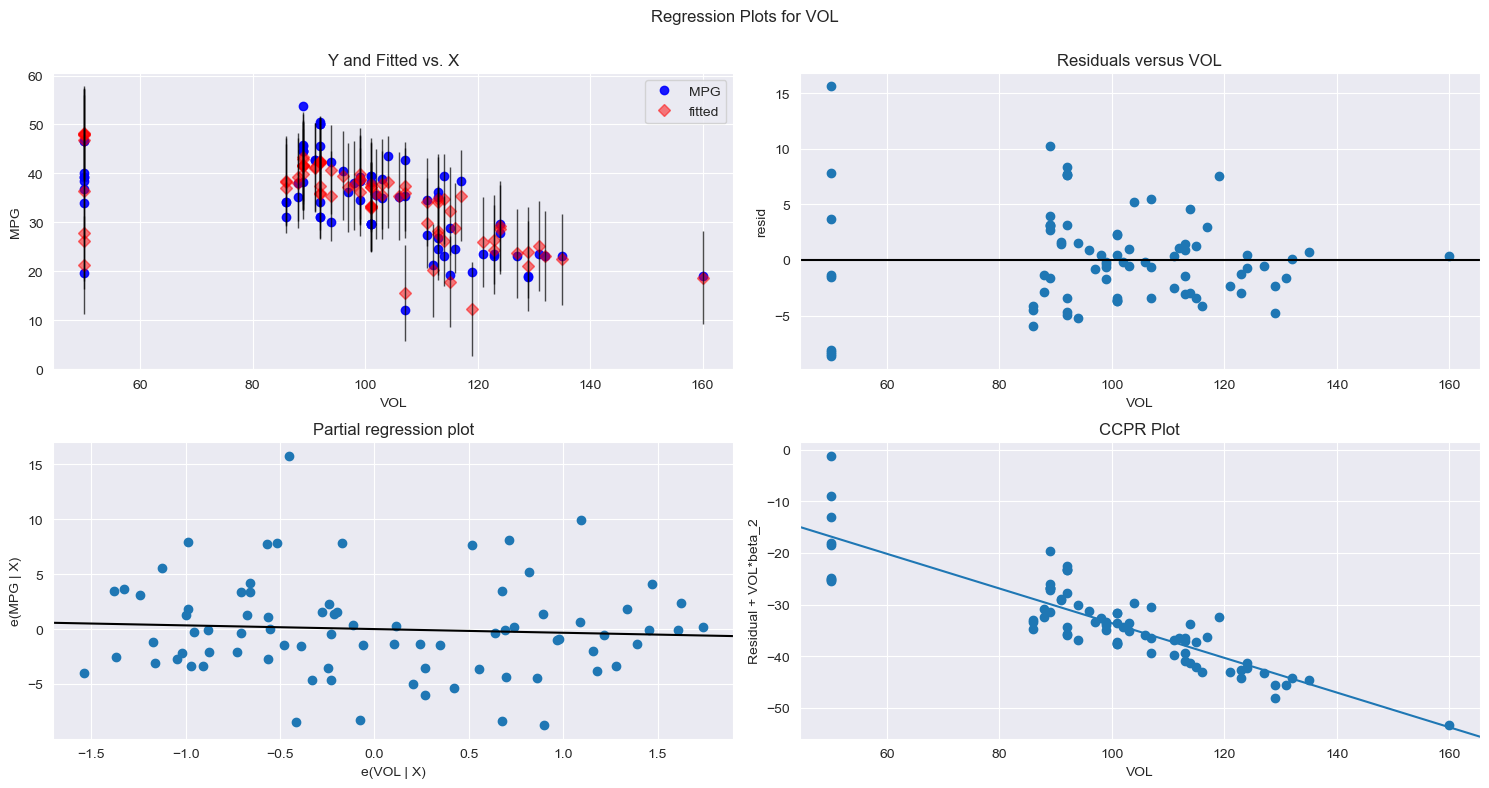

In [38]:
fig =  plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

# detecting influencers/outliers

# cook's distance

In [39]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

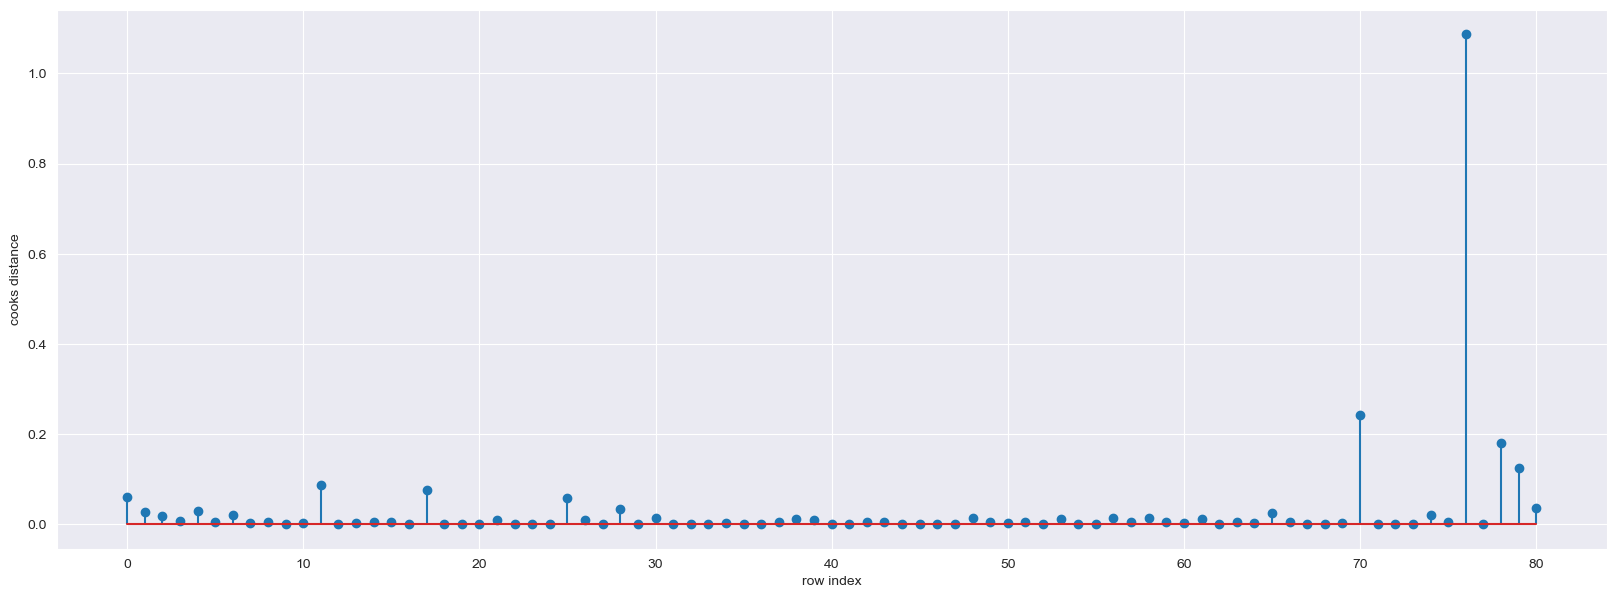

In [41]:
#plot the influencers value using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [42]:
# index and values of influencers where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998180098)

# high influence points

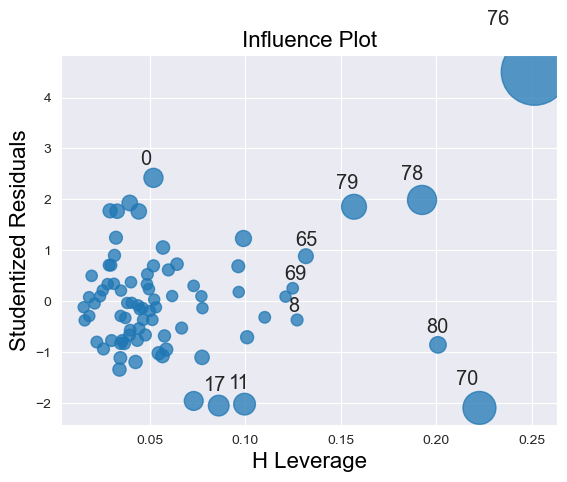

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = 4
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.18518518518518517

# from the above plot, it is evident that data pont 70 and 76 are the influencers

In [45]:
 cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [47]:
#see the difference in hp and other variable values 
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# improving the model

In [48]:
#load the data
cars_new = pd.read_csv("Cars.csv")

In [49]:
#discard the data points which are influencers and reasign the row number(reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [50]:
#drop the original index
car1=car1.drop(['index'],axis=1)

In [51]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# build model

In [52]:
#excluding variables "wt" and generate R-squared and AIC values
final_ml_v=smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [54]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic)

(0.8161692010376007, 446.11722639447726, 455.59501780434533)

In [55]:
#excluding variable "vol" and generate R-squared and AIC values
final_ml_w=smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [56]:
(final_ml_w.rsquared,final_ml_w.aic,final_ml_w.bic)

(0.8160034320495304, 446.1884323575032, 455.66622376737126)

# cooks distance

In [58]:
model_influence_v = final_ml_v.get_influence()
(c_v,_) = model_influence_v.cooks_distance

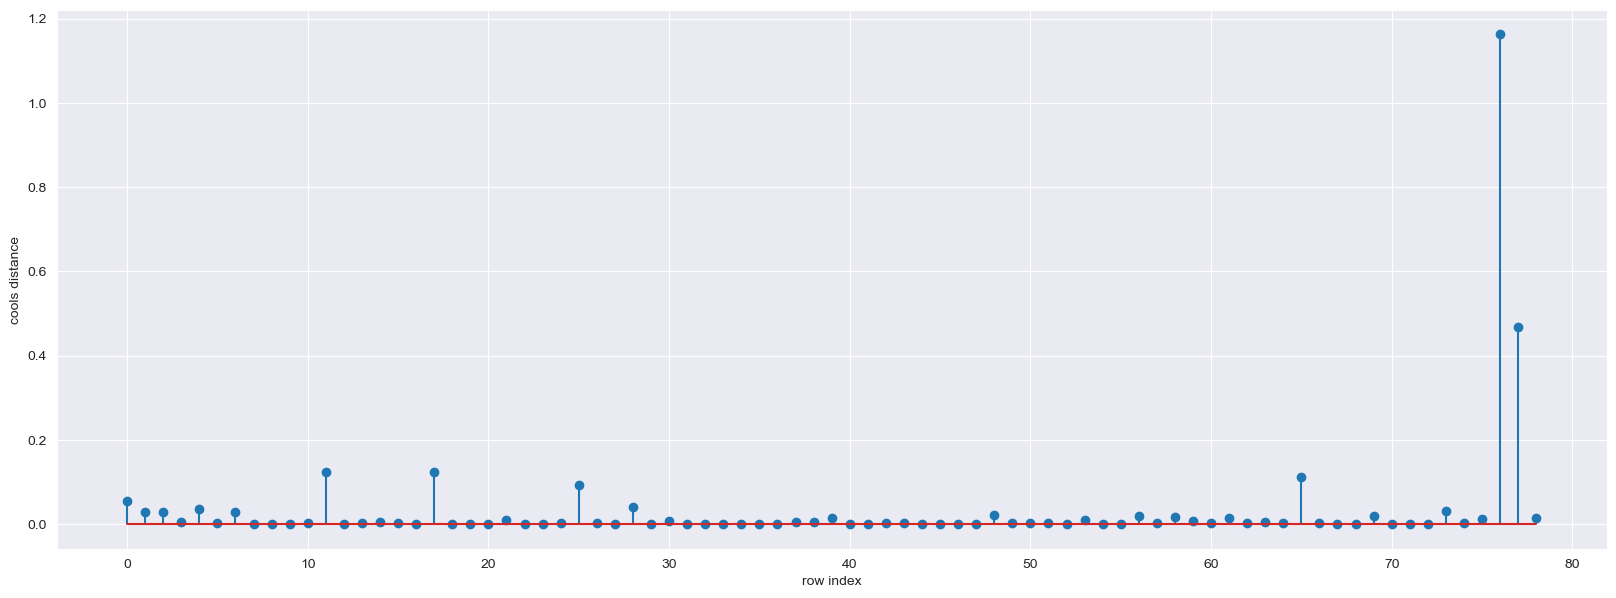

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3));
plt.xlabel('row index')
plt.ylabel('cools distance');

In [61]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(76, 1.1629387469135095)

In [65]:
#drop 76
car2=car1.drop(car1.index[[76]],axis=0)

In [66]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
77,295,19.833733,119,167.944460,39.423099


In [69]:
#reset the index and re arrange the row values
car3=car2.reset_index()
car3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113
76,77,295,19.833733,119,167.944460,39.423099


In [70]:
car4=car3.drop(['index'],axis=1)
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [71]:
#Build the model on the new data
final_ml_v = smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [73]:
#again check for influrncers
model_influence_v = final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

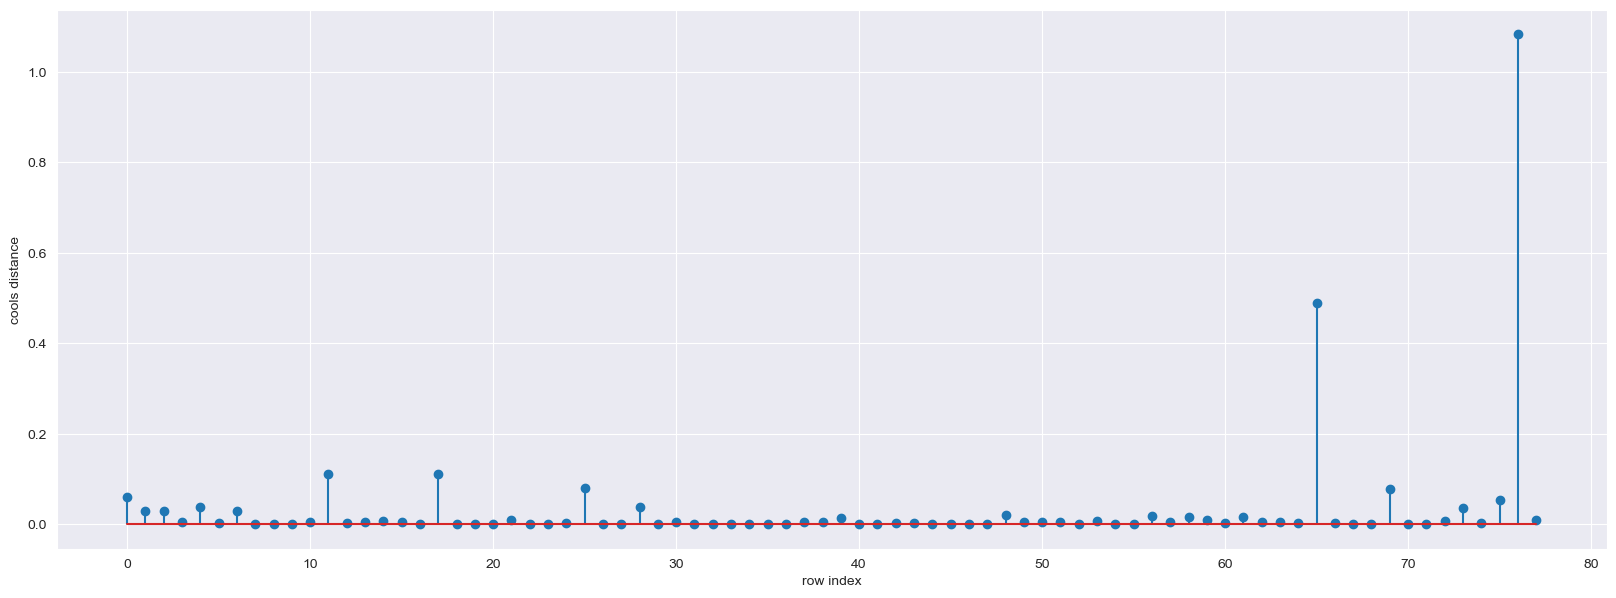

In [74]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_v,3));
plt.xlabel('row index')
plt.ylabel('cools distance');

In [75]:
 #index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(76, 1.0834592065958546)

In [76]:
car5=car4.drop(car1.index[[76]],axis=0)
car5

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [77]:
car6=car5.reset_index()
car6

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [78]:
car7=car6.drop(['index'],axis=1)
car7

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [79]:
#check the accuracy of the model
final_ml_v =smf.ols('MPG~VOL+SP+HP',data=car7).fit()

In [80]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8669636111859063, 409.41530627195084)

In [81]:
model_influence_v = final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

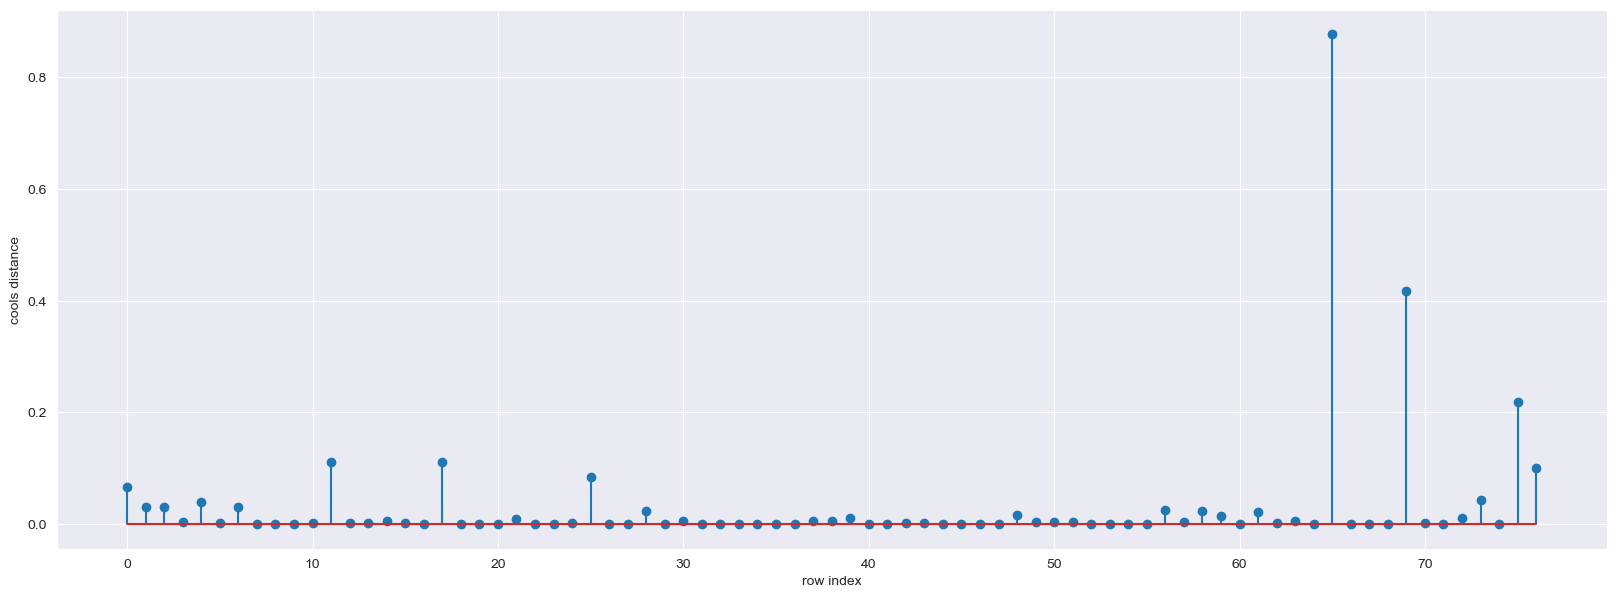

In [82]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3));
plt.xlabel('row index')
plt.ylabel('cools distance');

In [85]:
(np.argmax(c_v),np.max(c_v))

(65, 0.8774556986296826)

# predicting for new data

In [86]:
#new data for prediction
new_data=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':53},index=[1])

In [87]:
final_ml_v.predict(new_data)

1    46.035594
dtype: float64

In [88]:
final_ml_v.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [89]:
pred_y = final_ml_v.predict(cars_new)

In [90]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64